# Basic Manipulation

Splipy implements all affine transformations like translate (move), rotate, scale etc. These should be available as operators where this makes sense. To start, we need to import the libraries we are going to use first

In [1]:
import splipy as sp
import numpy as np
import matplotlib.pyplot as plt

import splipy.curve_factory as curve_factory

## Rotate

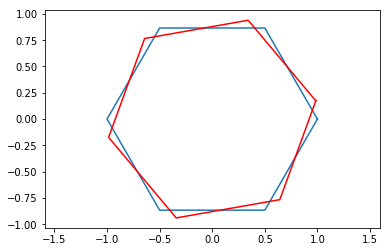

In [2]:
crv = curve_factory.n_gon(6)   # create a sample curve
t0  = crv.start()              # parametric starting point             
t1  = crv.end()                # parametric end point
t   = np.linspace(t0, t1, 361) # uniform grid of 361 evaluation points on the parametric domain

x = crv(t)
plt.plot(x[:,0], x[:,1])       # plot curve

crv.rotate(10.0/360*2*np.pi)   # rotate by 10 degrees (input is in radians)

x = crv(t)
plt.plot(x[:,0], x[:,1], 'r-') # plot curve (in red)

plt.axis('equal')
plt.show()

## Translate

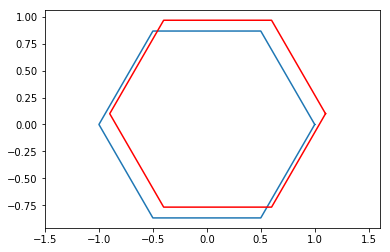

In [3]:
crv = curve_factory.n_gon(6)   # create a sample curve
t0  = crv.start()              # parametric starting point             
t1  = crv.end()                # parametric end point
t   = np.linspace(t0, t1, 361) # uniform grid of 361 evaluation points on the parametric domain

x = crv(t)
plt.plot(x[:,0], x[:,1])       # plot curve

dx = [0.1, 0.1]                # translation amount 
crv.translate(dx)              # move the object by 'dx'

x = crv(t)
plt.plot(x[:,0], x[:,1], 'r-') # plot curve (in red)

plt.axis('equal')
plt.show()

Note that translate can also be applied as an operator

In [4]:
crv.translate([1, 2])    # moves object 1 in x-direction, 2 in y-direction
crv   += [1,2]           # does the exact same thing
crv   = crv + [1,2]      # same thing
crv_2 = crv + [1,2]      # creates a new object crv_2 which is the translated version of crv
crv   += (1,2)           # translation vector only needs to be array-like (any indexable input will work)

## Scaling

Note that scaling is done in relation to the origin. Depending on your use, you might want to center the object around the origin before scaling.

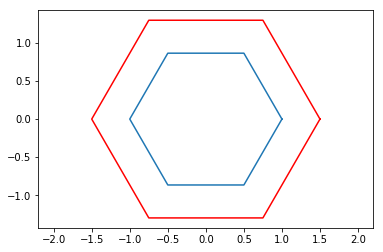

In [5]:
crv = curve_factory.n_gon(6)   # create a sample curve
t0  = crv.start()              # parametric starting point             
t1  = crv.end()                # parametric end point
t   = np.linspace(t0, t1, 361) # uniform grid of 361 evaluation points on the parametric domain

x = crv(t)
plt.plot(x[:,0], x[:,1])       # plot curve

crv.scale(1.5)                 # scales the object by a factor of 150%

x = crv(t)
plt.plot(x[:,0], x[:,1], 'r-') # plot curve (in red)

plt.axis('equal')
plt.show()

Scaling is also available as operators

In [6]:
crv.scale(1.5)
crv  *= 1.5         # does the exact same thing
crv   = crv * 1.5   # same thing
crv_2 = crv * 1.5   # keeps crv unchanged, returns a new object crv_2 which is the scaled version of crv
crv  *= (2,1)       # doubles the size in x-direction, while leaving the size in y-direction unchanged


## Control-point manipulation

For special case manipulation, it is possible to manipulate the controlpoints directly

In [7]:
curve = curve_factory.n_gon(6)

# for a slightly more inefficient translation operations, we may manipulate the controlpoints one-by-one
for controlpoint in curve:
    controlpoint += [1,0]

# alternative way of iterating over the controlpoints of a spline object
for i in range(len(curve)):
    curve[i] += [1,0]

print(curve)


p=2, [-1.  0.  1.  2.  3.  4.  5.  6.  7.], C0-periodic
[[  2.00000000e+00   0.00000000e+00]
 [  1.50000000e+00   8.66025404e-01]
 [  5.00000000e-01   8.66025404e-01]
 [  0.00000000e+00   1.22464680e-16]
 [  5.00000000e-01  -8.66025404e-01]
 [  1.50000000e+00  -8.66025404e-01]]


In [8]:
curve[0]   += [1,0] # this will move the first controlpoint one unit in the x-direction
curve[0,0] += 1     # exact same thing (now moved a total of two)
print(curve)

p=2, [-1.  0.  1.  2.  3.  4.  5.  6.  7.], C0-periodic
[[  4.00000000e+00   0.00000000e+00]
 [  1.50000000e+00   8.66025404e-01]
 [  5.00000000e-01   8.66025404e-01]
 [  0.00000000e+00   1.22464680e-16]
 [  5.00000000e-01  -8.66025404e-01]
 [  1.50000000e+00  -8.66025404e-01]]
